In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
# Load data
file_path = "C:/Users/mahmu/iCloudDrive/Study/Winter_24_25/ABDA/Project/dataset/AirQualityUCI.xlsx"
data = pd.read_excel(file_path)

In [3]:
# # Standardization
# scaler = StandardScaler()
# data_standardized = pd.DataFrame(scaler.fit_transform(data_imputed), columns=data.columns)

# # Normalization
# normalizer = MinMaxScaler()
# data_normalized = pd.DataFrame(normalizer.fit_transform(data_imputed), columns=data.columns)

In [4]:
print(data.columns)
print(len(data.columns))

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')
15


In [5]:
data = data[data.columns[2:]]

In [6]:
data.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [7]:
data.isna().sum()

CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [8]:
# Preprocessing
# Missing value handling
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)
# data_imputed = data.dropna()

In [9]:
data_imputed.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.00,150.0,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2.0,1292.25,112.0,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2.2,1402.00,88.0,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2.2,1375.50,80.0,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,1.6,1272.25,51.0,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [10]:
# Feature distribution checks
gamma_features = []
normal_features = []
for column in data.columns:
    if column != "Date" and column != "Time":
        print(f"[Info:] Working with column: {column}")
        skewness = stats.skew(data_imputed[column])
        kurtosis = stats.kurtosis(data_imputed[column])
        print(f"Skewness value: {skewness}")
        print(f"Kurtosis value: {kurtosis}")
        if skewness > 0 and kurtosis > 0:  # indicative of Gamma
            print(f"Column {column} can be used Gamma distribution")
            gamma_features.append(column)
        else:
            print(f"Column {column} can be used Normal distribution")
            normal_features.append(column)
        print("==============================")

[Info:] Working with column: CO(GT)
Skewness value: -1.6659123882972036
Kurtosis value: 0.7772485233134883
Column CO(GT) can be used Normal distribution
[Info:] Working with column: PT08.S1(CO)
Skewness value: -1.7208503331168468
Kurtosis value: 5.831752633254197
Column PT08.S1(CO) can be used Normal distribution
[Info:] Working with column: NMHC(GT)
Skewness value: 4.0751310428516
Kurtosis value: 18.85310427407573
Column NMHC(GT) can be used Gamma distribution
[Info:] Working with column: C6H6(GT)
Skewness value: -4.508051710755607
Kurtosis value: 19.17782064755835
Column C6H6(GT) can be used Normal distribution
[Info:] Working with column: PT08.S2(NMHC)
Skewness value: -0.7930258036330671
Kurtosis value: 2.367518335778291
Column PT08.S2(NMHC) can be used Normal distribution
[Info:] Working with column: NOx(GT)
Skewness value: 0.8251228942212316
Kurtosis value: 1.5041202985797852
Column NOx(GT) can be used Gamma distribution
[Info:] Working with column: PT08.S3(NOx)
Skewness value: -0

In [11]:
gamma_features

['NMHC(GT)', 'NOx(GT)']

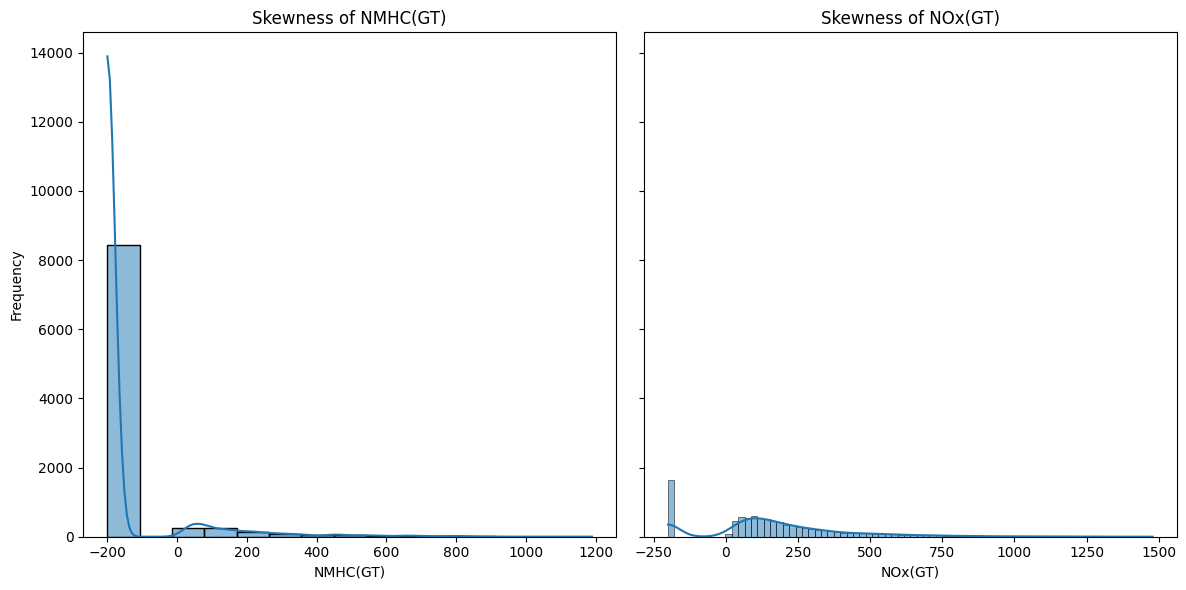

In [12]:
# Selecting the relevant columns and dropping rows with NaN values
relevant_columns = ['NMHC(GT)', 'NOx(GT)']
# data_filtered = data[relevant_columns].dropna()

# Plotting the skewness of 'NMHC(GT)' and 'NOx(GT)'
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# NMHC(GT)
sns.histplot(data_imputed['NMHC(GT)'], kde=True, ax=axes[0])
axes[0].set_title('Skewness of NMHC(GT)')
axes[0].set_xlabel('NMHC(GT)')
axes[0].set_ylabel('Frequency')

# NOx(GT)
sns.histplot(data_imputed['NOx(GT)'], kde=True, ax=axes[1])
axes[1].set_title('Skewness of NOx(GT)')
axes[1].set_xlabel('NOx(GT)')

plt.tight_layout()
plt.show()

In [13]:
normal_features

['CO(GT)',
 'PT08.S1(CO)',
 'C6H6(GT)',
 'PT08.S2(NMHC)',
 'PT08.S3(NOx)',
 'NO2(GT)',
 'PT08.S4(NO2)',
 'PT08.S5(O3)',
 'T',
 'RH',
 'AH']

Plotting for: PT08.S1(CO)
Plotting for: C6H6(GT)
Plotting for: PT08.S2(NMHC)
Plotting for: PT08.S3(NOx)
Plotting for: NO2(GT)
Plotting for: PT08.S4(NO2)
Plotting for: PT08.S5(O3)
Plotting for: T
Plotting for: RH
Plotting for: AH


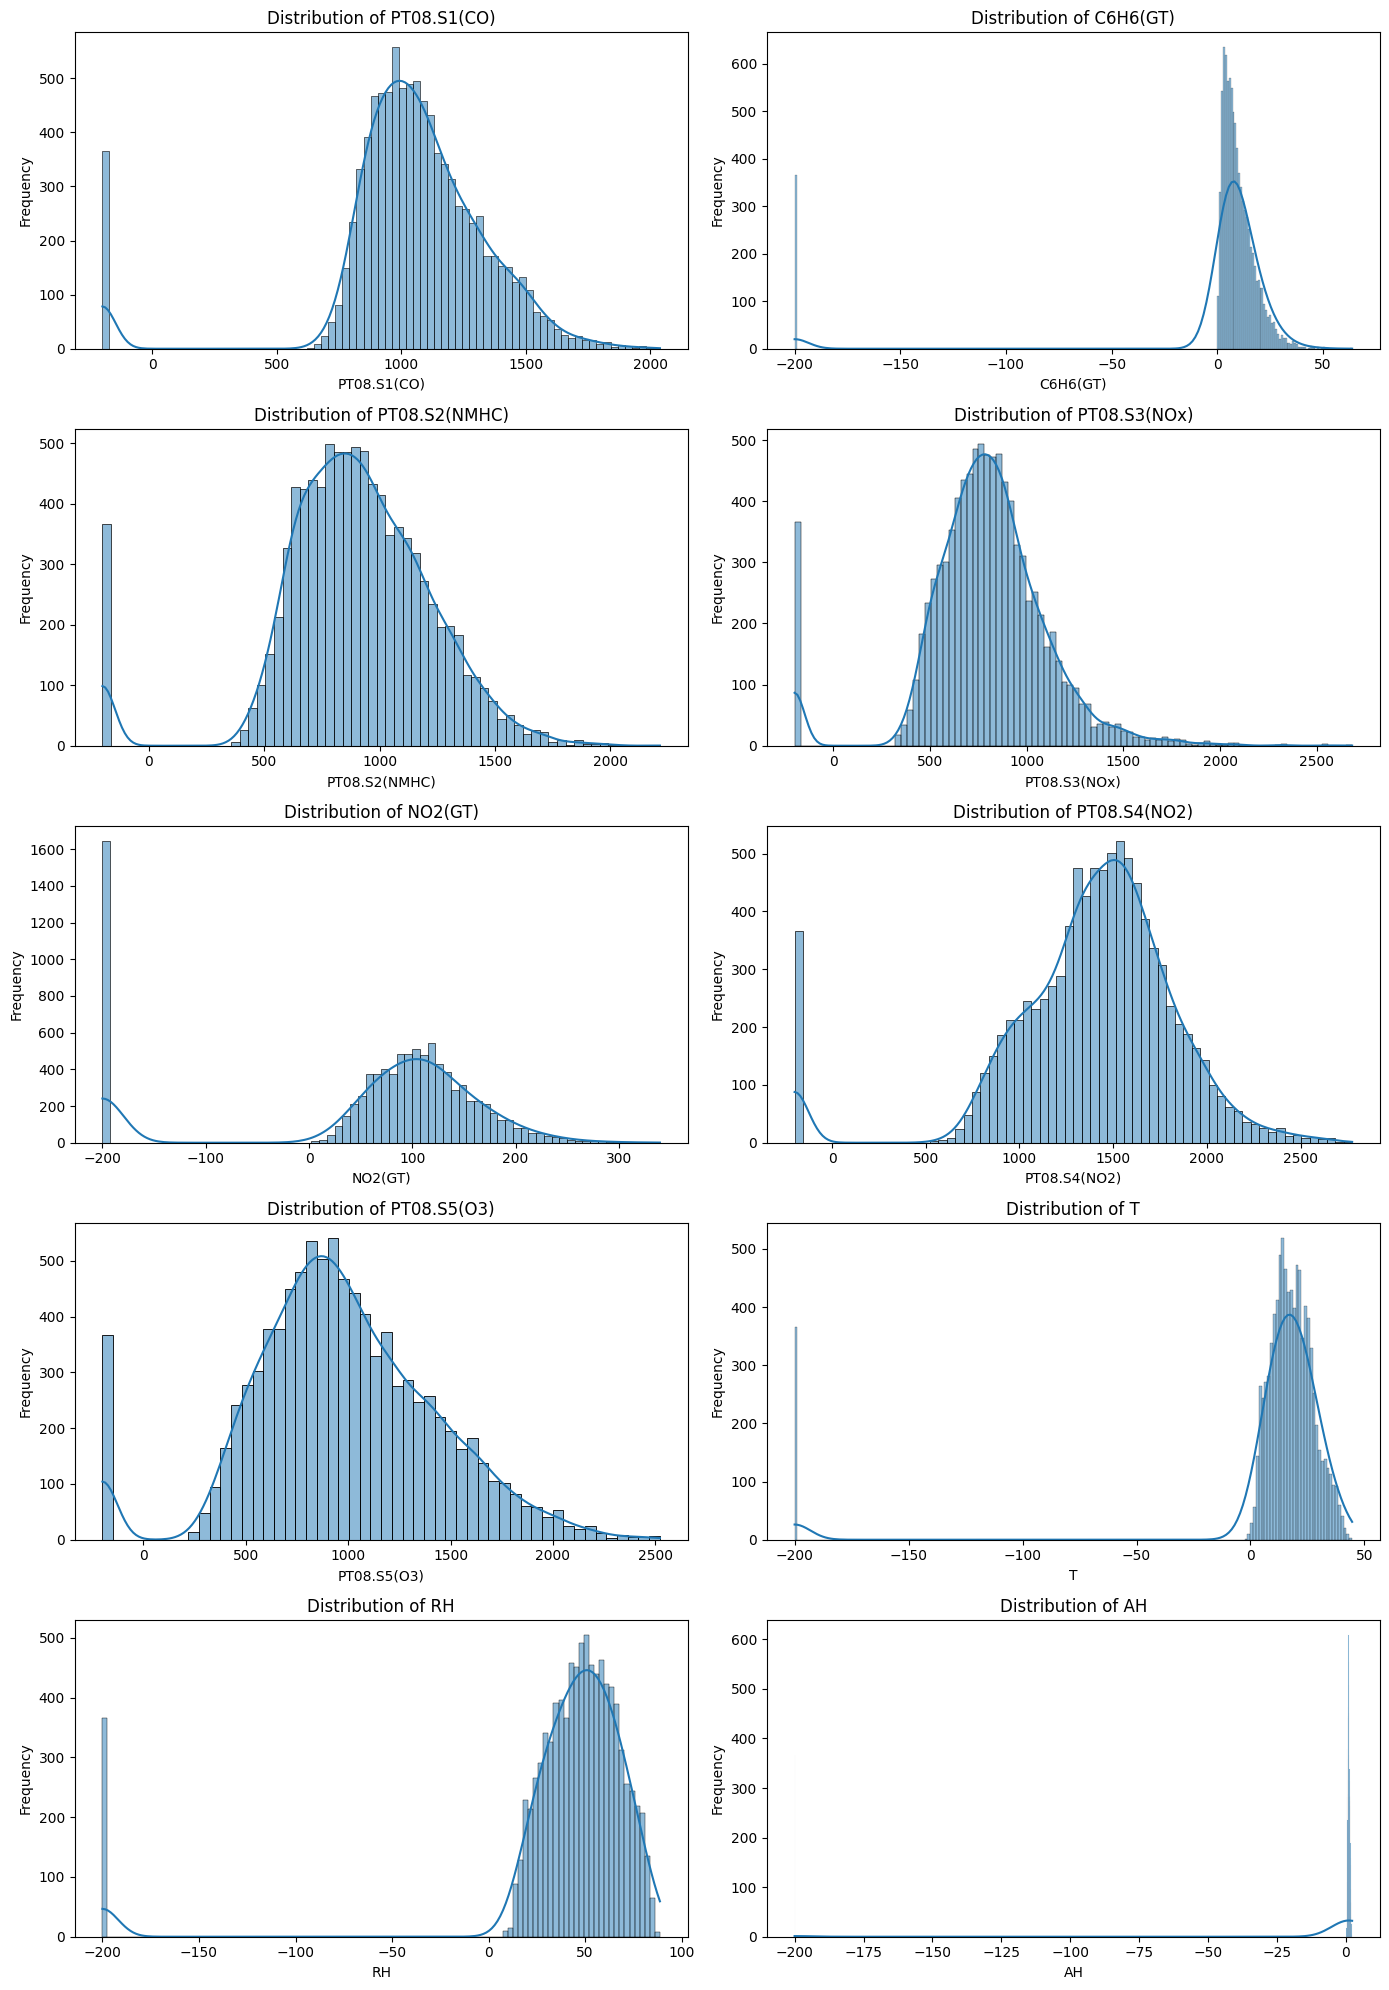

In [14]:
# Plotting each column
num_columns = len(normal_features[1:])
fig, axes = plt.subplots(5, 2, figsize=(14, 20))  # Adjusting for a grid layout

axes = axes.flatten()

for i, col in enumerate(normal_features[1:]):
    print(f"Plotting for: {col}")
    sns.histplot(data_imputed[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Trnasformation

In [15]:
print(gamma_features)

['NMHC(GT)', 'NOx(GT)']


In [16]:
for col in gamma_features:
    if data_imputed[col].min() <= 0:
        data_imputed[col] += abs(data_imputed[col].min()) + 1e-6  # ensure all values > 0
    data_imputed[col] = np.log(data_imputed[col])

In [17]:
print(normal_features)

['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']


In [18]:
# transformation of normal features.
for col in normal_features:
    mean = data_imputed[col].mean()
    std = data_imputed[col].std()
    data_imputed[col] = (data_imputed[col] - mean) / std

In [19]:
data.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [20]:
data_imputed.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,0.473975,0.943342,5.857933,0.242052,0.441183,5.902633,0.811790,0.432234,0.643497,0.640258,0.088498,0.183370,0.194869
1,0.466248,0.737925,5.743003,0.182010,0.176077,5.713733,1.176723,0.266791,0.358282,-0.005912,0.081554,0.160427,0.194041
2,0.468824,1.070686,5.662960,0.172359,0.130797,5.802118,1.071902,0.440112,0.349185,0.216773,0.049149,0.282948,0.194677
3,0.468824,0.990338,5.634790,0.177941,0.157089,5.918894,0.922823,0.503139,0.411793,0.499643,0.028317,0.400588,0.195612
4,0.461097,0.677286,5.525453,0.112437,-0.172285,5.802118,1.273779,0.455869,0.211127,0.295561,0.031789,0.392290,0.195666


Re-Plotting

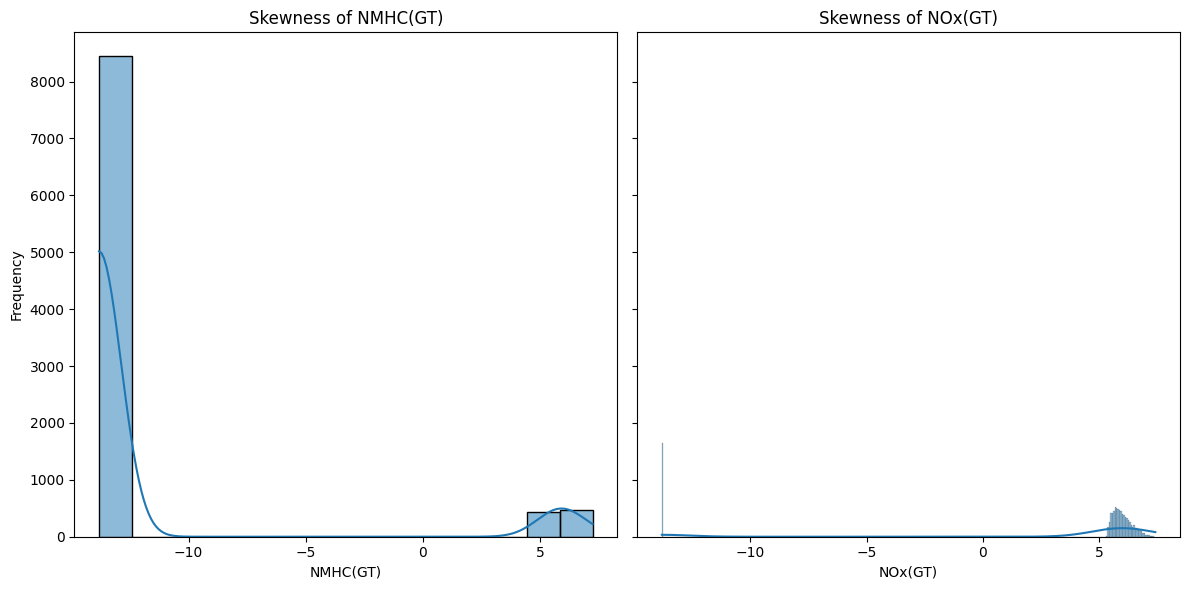

In [21]:
# Selecting the relevant columns and dropping rows with NaN values
relevant_columns = ['NMHC(GT)', 'NOx(GT)']
# data_filtered = data[relevant_columns].dropna()

# Plotting the skewness of 'NMHC(GT)' and 'NOx(GT)'
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# NMHC(GT)
sns.histplot(data_imputed['NMHC(GT)'], kde=True, ax=axes[0])
axes[0].set_title('Skewness of NMHC(GT)')
axes[0].set_xlabel('NMHC(GT)')
axes[0].set_ylabel('Frequency')

# NOx(GT)
sns.histplot(data_imputed['NOx(GT)'], kde=True, ax=axes[1])
axes[1].set_title('Skewness of NOx(GT)')
axes[1].set_xlabel('NOx(GT)')

plt.tight_layout()
plt.show()

Plotting for: PT08.S1(CO)
Plotting for: C6H6(GT)
Plotting for: PT08.S2(NMHC)
Plotting for: PT08.S3(NOx)
Plotting for: NO2(GT)
Plotting for: PT08.S4(NO2)
Plotting for: PT08.S5(O3)
Plotting for: T
Plotting for: RH
Plotting for: AH


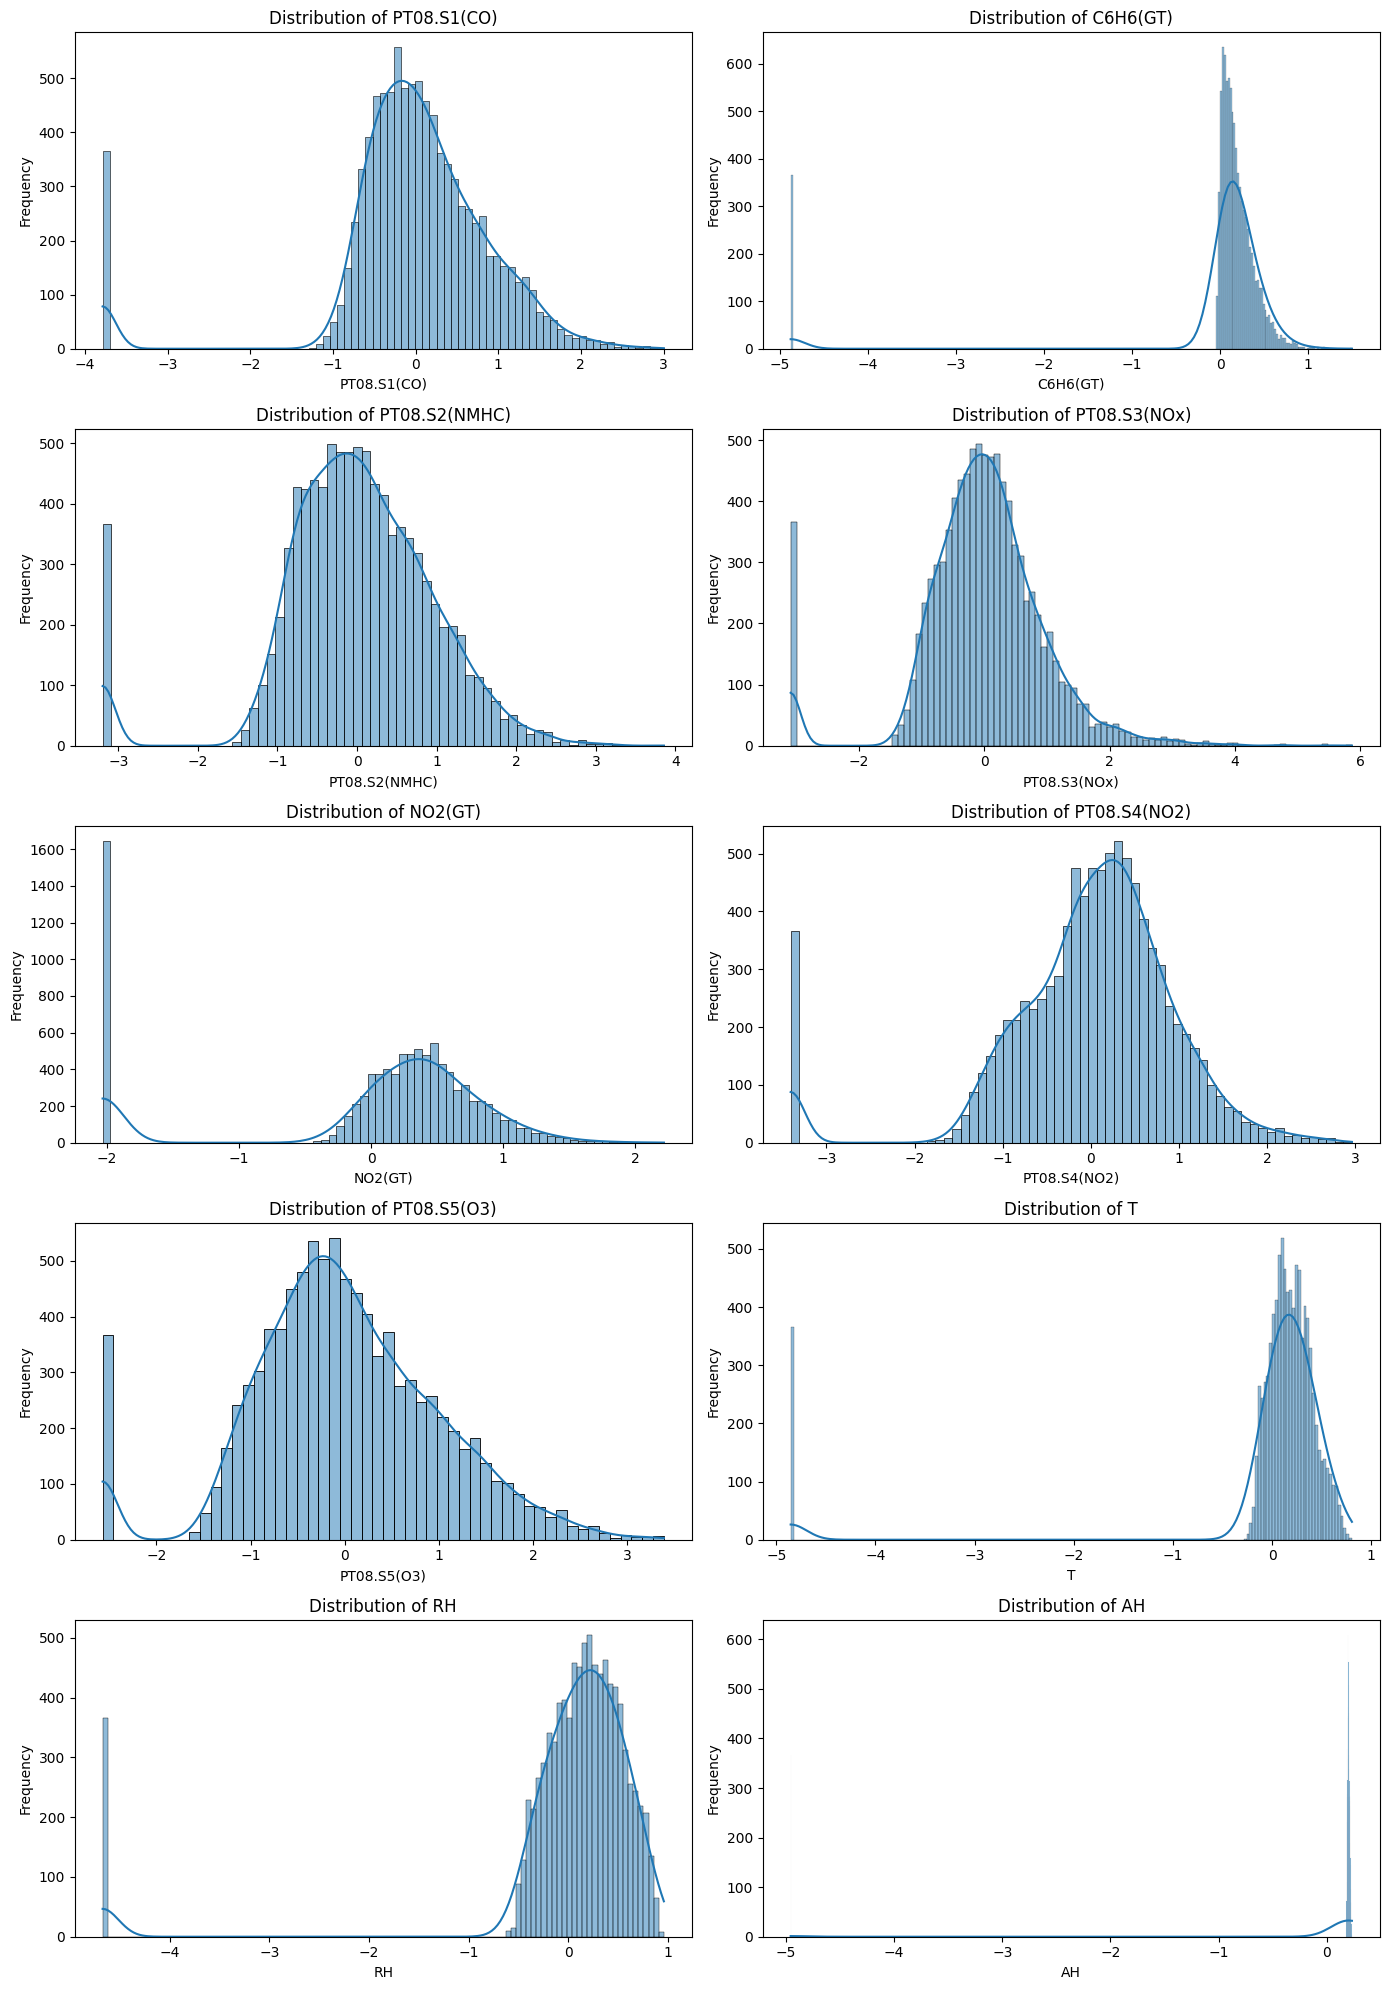

In [22]:
# Plotting each column
num_columns = len(normal_features[1:])
fig, axes = plt.subplots(5, 2, figsize=(14, 20))  # Adjusting for a grid layout

axes = axes.flatten()

for i, col in enumerate(normal_features[1:]):
    print(f"Plotting for: {col}")
    sns.histplot(data_imputed[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Validating the Transformations

In [23]:
# Function to perform distribution testing
def test_distribution(data, columns, distribution_type):
    results = {}
    for col in columns:
        if distribution_type == 'gamma':
            # Fit the Gamma distribution and perform the Kolmogorov-Smirnov test
            shape, loc, scale = stats.gamma.fit(data[col])
            ks_stat, p_value = stats.kstest(data[col], 'gamma', args=(shape, loc, scale))
        elif distribution_type == 'normal':
            # Perform the Shapiro-Wilk test for normality
            ks_stat, p_value = stats.shapiro(data[col])
        else:
            raise ValueError("Unsupported distribution type")
        results[col] = {"KS Statistic": ks_stat, "P-Value": p_value}
    return results

In [24]:
# Columns to test
print(f"Gamma features: {gamma_features}")
print(f"Normal features: {normal_features}")

Gamma features: ['NMHC(GT)', 'NOx(GT)']
Normal features: ['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']


In [25]:
# Test distributions
gamma_test_results = test_distribution(data_imputed, gamma_features, 'gamma')
normal_test_results = test_distribution(data_imputed, normal_features, 'normal')

# Combine results into dataframes for better readability
gamma_results_df = pd.DataFrame(gamma_test_results).T
normal_results_df = pd.DataFrame(normal_test_results).T

c:\Users\mahmu\anaconda3\envs\abda\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9357.
  res = hypotest_fun_out(*samples, **kwds)


In [26]:
gamma_results_df.head()

,KS Statistic,P-Value
NMHC(GT),0.902319,0.0
NOx(GT),0.737681,0.0


In [27]:
normal_results_df.head(10)

,KS Statistic,P-Value
CO(GT),0.482373,1.029098e-96
PT08.S1(CO),0.823254,1.858922e-72
C6H6(GT),0.339423,1.023870e-102
PT08.S2(NMHC),0.931125,4.026678e-54
PT08.S3(NOx),0.925006,1.152780e-55
NO2(GT),0.777378,2.296916e-77
PT08.S4(NO2),0.902403,1.390820e-60
PT08.S5(O3),0.979383,1.177236e-34
T,0.368580,1.365368e-101
RH,0.499802,6.929791e-96


Histogram and Q-Q Plot Validation for Transformation

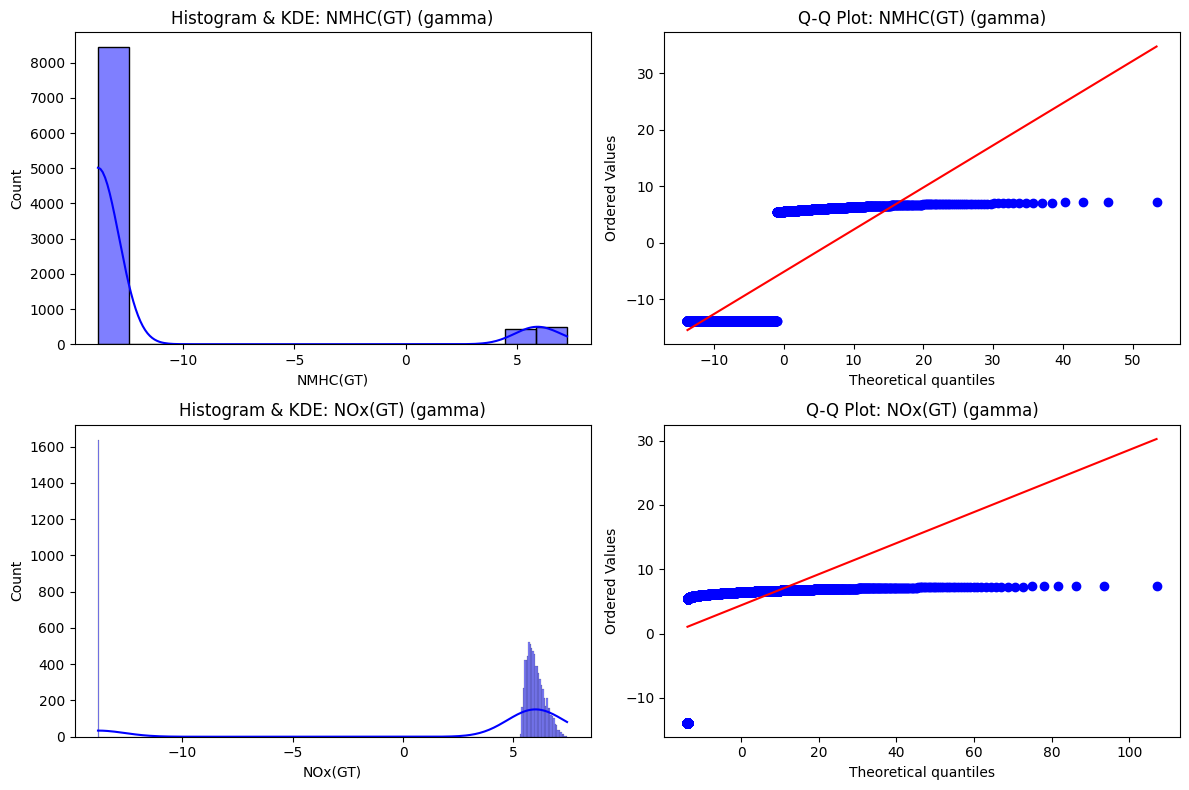

In [28]:
# Updated function for Gamma Q-Q plots with parameter estimation
def plot_distribution_diagnostics(data, columns, distribution_type):
    num_cols = len(columns)
    fig, axes = plt.subplots(num_cols, 2, figsize=(12, num_cols * 4))
    for i, col in enumerate(columns):
        # Histogram with KDE
        sns.histplot(data[col], kde=True, ax=axes[i, 0], color='blue')
        axes[i, 0].set_title(f'Histogram & KDE: {col} ({distribution_type})')
        axes[i, 0].set_xlabel(col)
        
        # Q-Q Plot
        if distribution_type == 'gamma':
            # Estimate parameters for Gamma
            shape, loc, scale = stats.gamma.fit(data[col])
            stats.probplot(data[col], dist="gamma", sparams=(shape, loc, scale), plot=axes[i, 1])
        elif distribution_type == 'normal':
            stats.probplot(data[col], dist="norm", plot=axes[i, 1])
        axes[i, 1].set_title(f'Q-Q Plot: {col} ({distribution_type})')
    
    plt.tight_layout()
    plt.show()

# Visualize Gamma-distributed columns
plot_distribution_diagnostics(data_imputed, gamma_features, 'gamma')

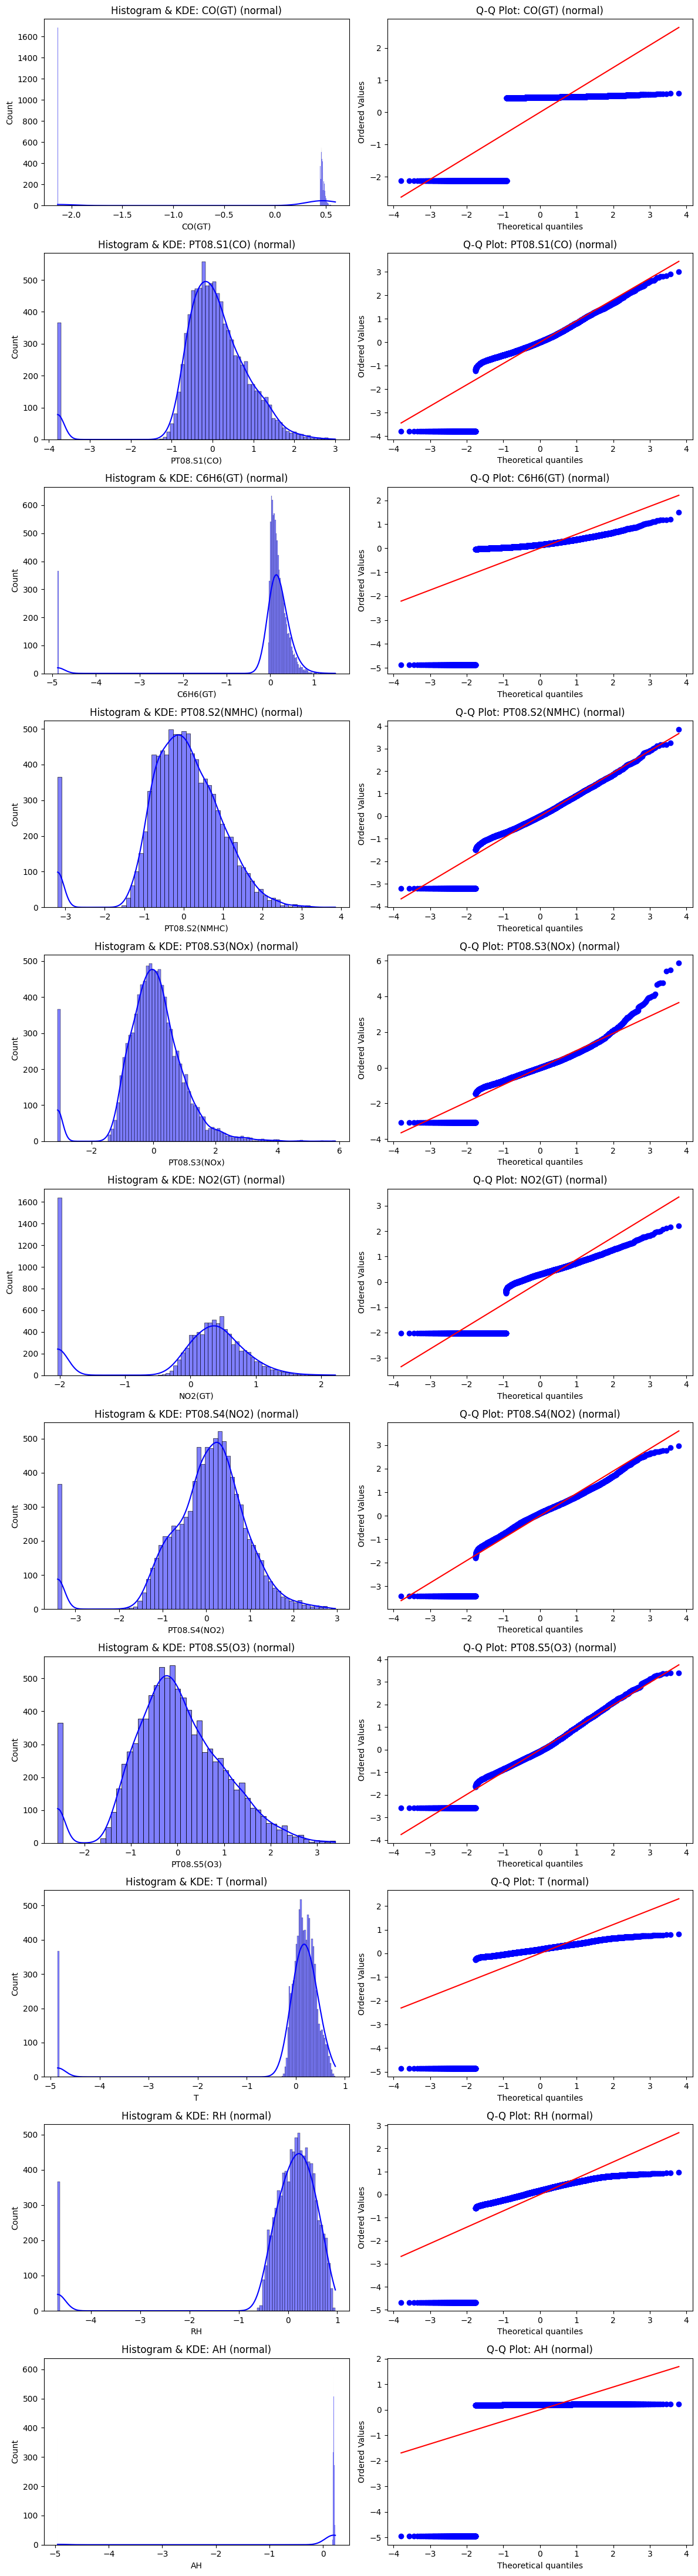

In [29]:
# Visualize Normal-distributed columns
plot_distribution_diagnostics(data_imputed, normal_features, 'normal')

Re-transformation

In [81]:
def transform_and_standardize(data, gamma_features, normal_features):
    transformed_data = data.copy()
    if gamma_features:
        # Refine transformations for Gamma-distributed columns (Box-Cox)
        for col in gamma_features:
            if transformed_data[col].min() <= 0:
                transformed_data[col] += abs(transformed_data[col].min()) + 1e-0  # Ensure positivity
        transformed_data[col], _ = stats.boxcox(transformed_data[col])  # Apply Box-Cox transformation
    elif normal_features:
        for col in normal_features:
            if transformed_data[col].min() <= 0:
                transformed_data[col] += abs(transformed_data[col].min()) + 1e-0  # Ensure positivity
            
            # Apply log or square root transformation
            skewness = transformed_data[col].skew()
            if skewness > 1:
                transformed_data[col] = np.log(transformed_data[col])  # Log transformation for high skewness
            elif 0.5 < skewness <= 1:
                transformed_data[col] = np.sqrt(transformed_data[col])  # Square root transformation for moderate skewness
            
            # Standardize the column
            mean = transformed_data[col].mean()
            std = transformed_data[col].std()
            transformed_data[col] = (transformed_data[col] - mean) / std
    return transformed_data

In [82]:
data_transformed = transform_and_standardize(data_imputed, gamma_features=gamma_features, normal_features=normal_features)

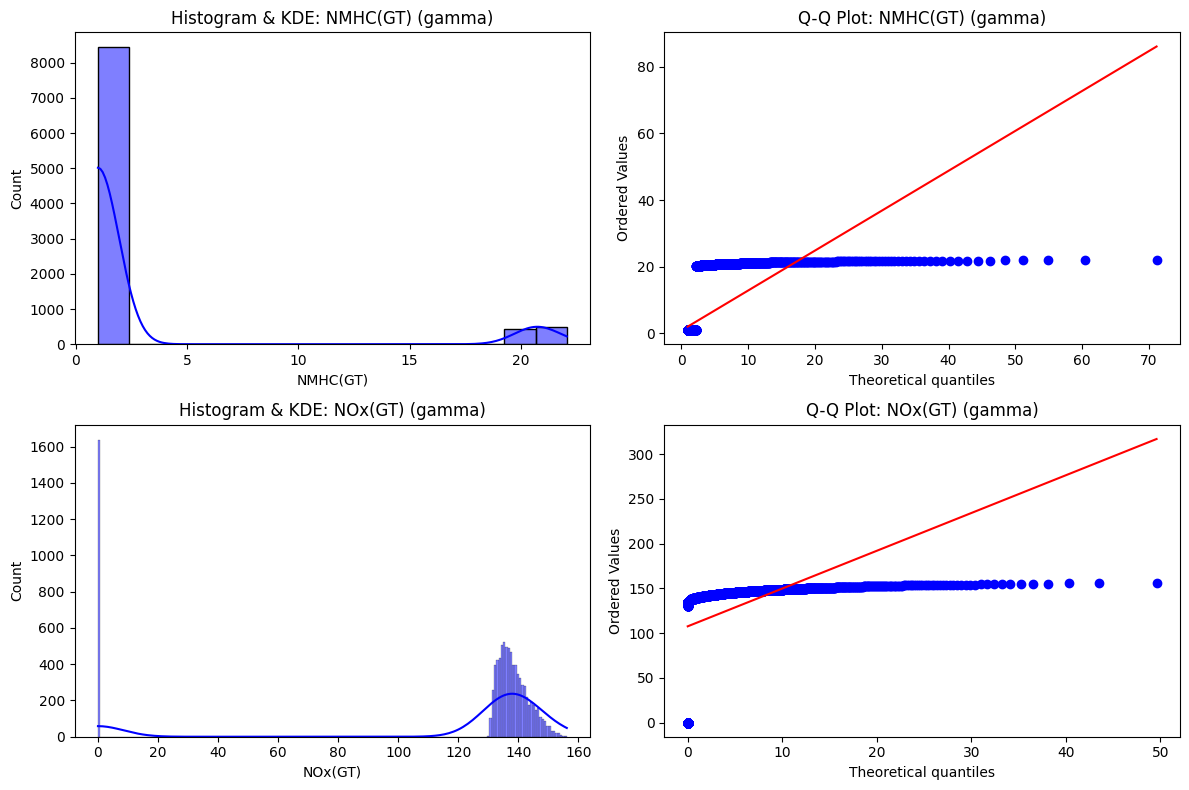

In [83]:
# Recheck the distributions with updated transformations
plot_distribution_diagnostics(data_transformed, gamma_features, 'gamma')

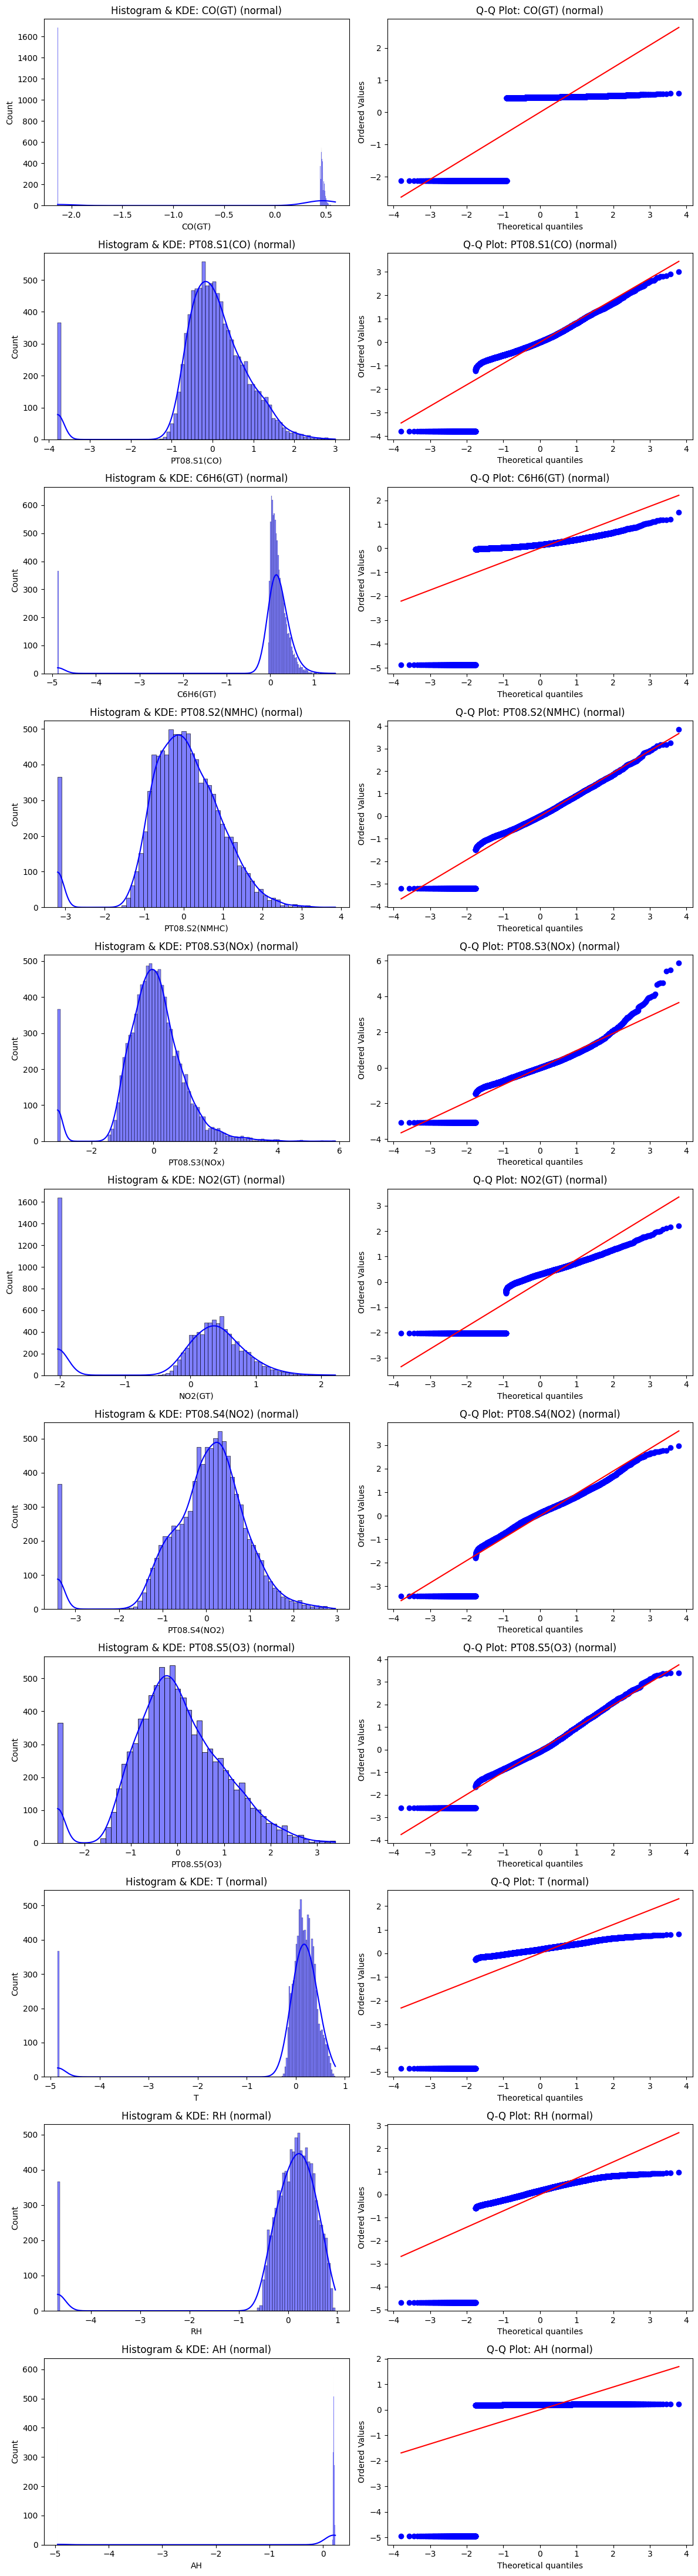

In [84]:
plot_distribution_diagnostics(data_transformed, normal_features, 'normal')